In [2]:
import numpy as np
import scanpy as sc

In [3]:
#Read adata
results_file = "../results_cellbender/SRR25669275/SRR25669275_cellbender_filtered.h5"

In [6]:
adata = sc.read_10x_h5(results_file)
adata.var_names_make_unique()

/home/aleksandra_smigas/.local/lib/python3.10/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/aleksandra_smigas/.local/lib/python3.10/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


In [10]:
# adata = sc.read_10x_mtx(
#     "../results/cellranger/count/Sample_X/outs/raw_feature_bc_matrix/",  # the directory with the `.mtx` file
#     var_names="gene_symbols",  # use gene symbols for the variable names (variables-axis index)
#     cache=True,  # write a cache file for faster subsequent reading
# )
# adata.var_names_make_unique() 

In [7]:
adata

AnnData object with n_obs × n_vars = 12749 × 29972
    var: 'gene_ids', 'feature_types', 'genome'

#Preprocessing

In [8]:
#calculate the proportions of counts for specific gene
# mitochondrial genes
adata.var["mt"] = adata.var_names.str.startswith("MT-")
# ribosomal genes
adata.var["ribo"] = adata.var_names.str.startswith(("RPS", "RPL"))
# hemoglobin genes.
adata.var["hb"] = adata.var_names.str.contains(("^HB[^(P)]"))

In [9]:
adata.var_names

Index(['DDX11L1', 'WASH7P', 'MIR6859-1', 'MIR1302-2', 'FAM138A', 'OR4F5',
       'LOC101927589', 'LOC729737', 'LOC100996442', 'LOC102723897',
       ...
       'TTTY4C', 'TTTY17C', 'GOLGA2P3Y', 'CSPG4P1Y', 'LOC102724004', 'CDY1',
       'TTTY3', 'SPRY3-1', 'VAMP7-1', 'IL9R-1'],
      dtype='object', length=29972)

In [11]:
#calculate the respective QC metrics with scanpy
#mitochondrial, ribosomal and hemoglobin genes
sc.pp.calculate_qc_metrics(
    adata, qc_vars=["mt", "ribo", "hb"], inplace=True, percent_top=[20], log1p=True
)
adata

AnnData object with n_obs × n_vars = 12749 × 29972
    obs: 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb'
    var: 'gene_ids', 'feature_types', 'genome', 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'

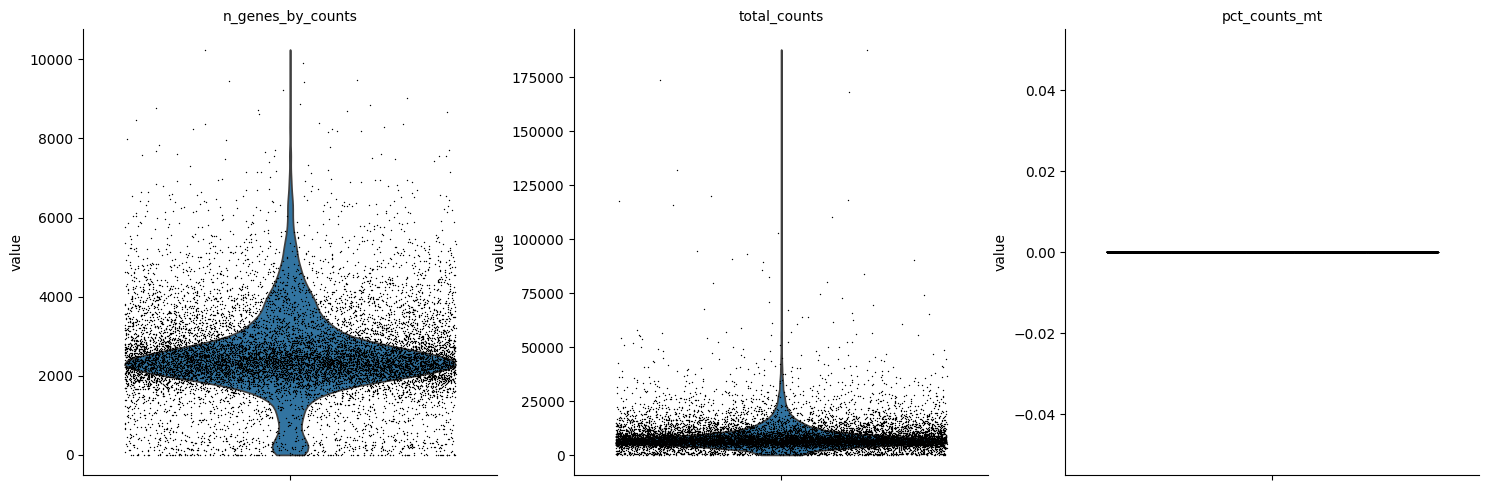

In [12]:
sc.pl.violin(
    adata,
    ["n_genes_by_counts", "total_counts", "pct_counts_mt"],
    jitter=0.4,
    multi_panel=True,
)


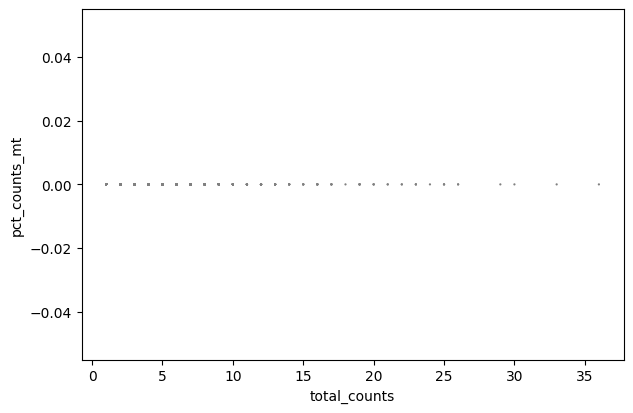

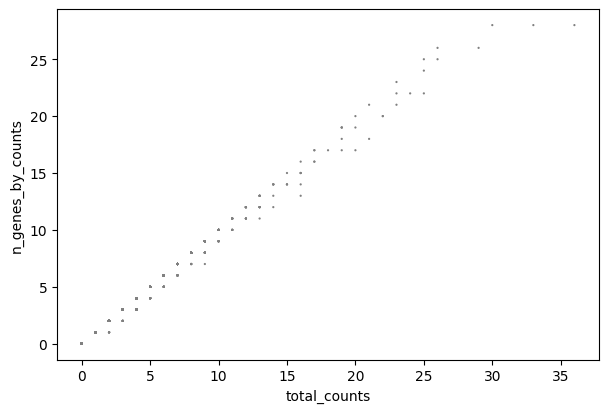

In [14]:
sc.pl.scatter(adata, x="total_counts", y="pct_counts_mt")
sc.pl.scatter(adata, x="total_counts", y="n_genes_by_counts")